Kütüphaneleri yükle

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

# scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from skimage.transform import resize

# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Görsel
import seaborn as sns

# Torch
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms



In [ ]:
# Tüm görüntüleri 32x32 boyutuna yeniden boyutlandırmak için dönüşüm
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Görüntüleri 32x32 boyutuna ayarla
    transforms.ToTensor()         # Görüntüleri tensöre çevir
])

# Yeni Bölüm

In [ ]:
# Eğitim veri setini indir ve yükle
train_dataset = datasets.GTSRB(
    root='./data', split='train', download=True, transform=transform
)

# Test veri setini indir ve yükle
test_dataset = datasets.GTSRB(
    root='./data', split='test', download=True, transform=transform
)


100%|██████████| 187M/187M [00:01<00:00, 145MB/s]


Extracting data/gtsrb/GTSRB-Training_fixed.zip to data/gtsrb


100%|██████████| 89.0M/89.0M [00:00<00:00, 114MB/s]


Extracting data/gtsrb/GTSRB_Final_Test_Images.zip to data/gtsrb


100%|██████████| 99.6k/99.6k [00:00<00:00, 1.63MB/s]

Extracting data/gtsrb/GTSRB_Final_Test_GT.zip to data/gtsrb


In [ ]:
# Eğitim ve etiketlerini numpy formatına dönüştür
train_data = np.array([np.array(img.permute(1, 2, 0)) for img, label in train_dataset])
train_labels = np.array([label for _, label in train_dataset])

# Test verisi ve etiketlerini numpy formatına dönüştür
test_data = np.array([np.array(img.permute(1, 2, 0)) for img, label in test_dataset])
test_labels = np.array([label for _, label in test_dataset])

In [ ]:
# Veri setindeki örnekleri kontrol et
missing_data_count = sum(1 for i in range(len(train_dataset)) if train_dataset[i][0] is None or train_dataset[i][1] is None)

print(f"Eksik veri bulunan örnek sayısı: {missing_data_count}")

missing_data_count_test = sum(1 for i in range(len(test_dataset)) if test_dataset[i][0] is None or test_dataset[i][1] is None)

print(f"Eksik veri bulunan örnek sayısı: {missing_data_count_test}")


Eksik veri bulunan örnek sayısı: 0
Eksik veri bulunan örnek sayısı: 0


In [ ]:
# Veriyi %80 eğitim, %20 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


# Verilerin boyutlarını kontrol et
print(f"Eğitim verisi boyutu: {X_train.shape}, Eğitim etiketleri boyutu: {y_train.shape}")
print(f"Test verisi boyutu: {X_test.shape}, Test etiketleri boyutu: {y_test.shape}")

Eğitim verisi boyutu: (21312, 32, 32, 3), Eğitim etiketleri boyutu: (21312,)
Test verisi boyutu: (5328, 32, 32, 3), Test etiketleri boyutu: (5328,)


In [ ]:
##Özellik Ölçekleme (Feature Scaling):

# Veriyi standartlaştırma (feature scaling) işlemi
scaler = StandardScaler()

# Eğitim verisini ölçeklendir
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))  # Görüntüleri 1D dizilere dönüştür

# Test verisini ölçeklendir
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))  # Test verisini aynı scaler ile dönüştür

# Boyutları kontrol et
print(f"Ölçeklendirilmiş eğitim verisi boyutu: {X_train_scaled.shape}")
print(f"Ölçeklendirilmiş test verisi boyutu: {X_test_scaled.shape}")


Ölçeklendirilmiş eğitim verisi boyutu: (21312, 3072)
Ölçeklendirilmiş test verisi boyutu: (5328, 3072)


##3. Model Eğitimi ve Hiperparametre Denemeleri - MLP MODEL

In [ ]:
# MLPClassifier modelini oluşturma
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)

# Modeli eğitim verisi ile eğitme
mlp_model.fit(X_train_scaled, y_train)

# Eğitim tamamlandıktan sonra doğruluğu değerlendirme
train_accuracy = mlp_model.score(X_train_scaled, y_train)
test_accuracy = mlp_model.score(X_test_scaled, y_test)

print(f"Eğitim doğruluğu: {train_accuracy * 100:.2f}%")
print(f"Test doğruluğu: {test_accuracy * 100:.2f}%")


Eğitim doğruluğu: 97.57%
Test doğruluğu: 94.26%


In [ ]:
from sklearn.neural_network import MLPClassifier

# Modeli oluştururken max_iter'ı artırarak daha fazla iterasyonla eğitime devam ediyoruz
# Ayrıca tol parametresi ile doğruluk iyileşmesi durduğunda eğitim duracaktır.

mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64),
                          activation='relu',
                          solver='adam',
                          learning_rate_init=0.001,
                          max_iter=500,
                          tol=1e-4,
                          alpha=0.001,  # L2 Regularization
                          early_stopping=True,  # Early stopping
                          random_state=42)

# Modeli eğitim verileriyle eğitiyoruz
mlp_model.fit(X_train_scaled, y_train)

# Eğitim ve test doğruluklarını hesaplayalım
train_accuracy = mlp_model.score(X_train_scaled, y_train)
test_accuracy = mlp_model.score(X_test_scaled, y_test)

print(f"Eğitim doğruluğu: {train_accuracy * 100:.2f}%")
print(f"Test doğruluğu: {test_accuracy * 100:.2f}%")


Eğitim doğruluğu: 98.33%
Test doğruluğu: 95.48%


In [ ]:
#Modeli Kaydetme

from joblib import dump, load

dump(mlp_model, 'mlp_classifier_model.joblib')
print("MLPClassifier modeli kaydedildi.")

MLPClassifier modeli kaydedildi.


In [ ]:
# Eğitim ve test veri boyutlarını kontrol et
print(f"Eğitim verisi boyutu (özellikler): {X_train.shape}")
print(f"Eğitim etiketi boyutu: {y_train.shape}")
print(f"Test verisi boyutu (özellikler): {X_test.shape}")
print(f"Test etiketi boyutu: {y_test.shape}")

# Ölçeklendirilmiş veri boyutlarını kontrol et
print(f"Ölçeklendirilmiş eğitim verisi boyutu: {X_train_scaled.shape}")
print(f"Ölçeklendirilmiş test verisi boyutu: {X_test_scaled.shape}")


Eğitim verisi boyutu (özellikler): (21312, 32, 32, 3)
Eğitim etiketi boyutu: (21312,)
Test verisi boyutu (özellikler): (5328, 32, 32, 3)
Test etiketi boyutu: (5328,)
Ölçeklendirilmiş eğitim verisi boyutu: (21312, 3072)
Ölçeklendirilmiş test verisi boyutu: (5328, 3072)


In [ ]:
#RBF
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Parametreler için bir sınıf (class) oluşturuyoruz
class ModelParams:
    def __init__(self, kernel='rbf', gamma='scale', C=1.0, random_state=42):
        self.kernel = kernel
        self.gamma = gamma
        self.C = C
        self.random_state = random_state

# Parametreler nesnesi oluşturuyoruz
params = ModelParams(kernel='rbf', gamma='scale', C=1.0, random_state=42)

# Veriyi %80 eğitim, %20 test olarak ayırma (Bu kısım zaten önceki kodda yapılmış)
# X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Özellik Ölçekleme (Feature Scaling) işlemi
scaler = StandardScaler()

# Eğitim verisini ölçeklendiriyoruz (Eğitim verisi reshape edildiği için önceki şekli korunmuş)
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))

# Test verisini ölçeklendiriyoruz
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))

# Modeli oluştururken parametreler nesnesini kullanıyoruz
svm_rbf_model = SVC(kernel=params.kernel, gamma=params.gamma, C=params.C, random_state=params.random_state)

# Modeli eğitim verisi ile eğitme
svm_rbf_model.fit(X_train_scaled, y_train)

# Eğitim ve test doğruluklarını hesaplayalım
train_accuracy = svm_rbf_model.score(X_train_scaled, y_train)
test_accuracy = svm_rbf_model.score(X_test_scaled, y_test)

# Sonuçları yazdıralım
print(f"Eğitim doğruluğu: {train_accuracy * 100:.2f}%")
print(f"Test doğruluğu: {test_accuracy * 100:.2f}%")


Eğitim doğruluğu: 89.13%
Test doğruluğu: 86.52%


In [ ]:
# Eğitilen SVC modelini kaydedelim
from joblib import load,dump
dump(svm_rbf_model, 'svm_rbf_classifier_model.joblib')
print("SVC model kaydedildi.")

SVC model kaydedildi.


Modelleri yükleme

In [ ]:
from joblib import load

# Eğitilmiş modelleri yükleme
mlp_model = load('mlp_classifier_model.joblib')
svm_rbf_model = load('svm_rbf_classifier_model.joblib')


 Modelin eğitim ve test doğrulukları arasındaki farkın küçük olması, modelin genelleme yeteneği açısından oldukça iyi bir gösterge.

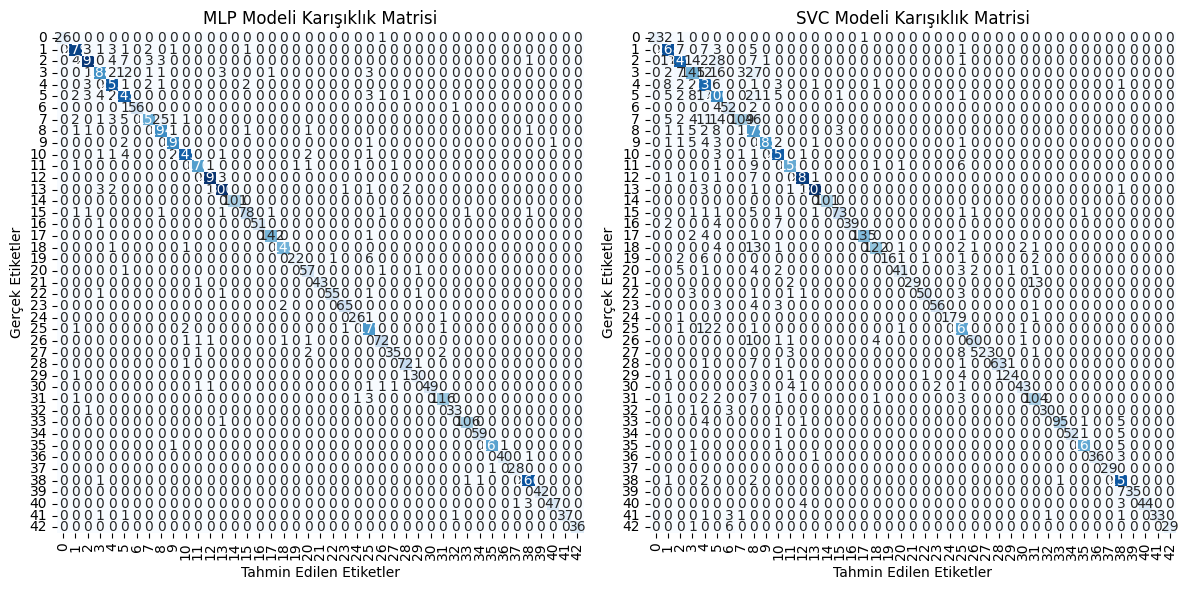

In [ ]:
##CONFUSION MATRIX
# Gerekli kütüphaneleri import ediyoruz
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. MLP Modeli için tahminler
mlp_predictions = mlp_model.predict(X_test_scaled)

# 2. SVC Modeli için tahminler
svm_rbf_predictions = svm_rbf_model.predict(X_test_scaled)

# 3. Her iki model için karışıklık matrisi oluşturuluyor
mlp_conf_matrix = confusion_matrix(y_test, mlp_predictions)
svm_rbf_conf_matrix = confusion_matrix(y_test, svm_rbf_predictions)

# 4. Karışıklık matrislerini görselleştirelim

# MLP Modeli için karışıklık matrisini çiziyoruz
plt.figure(figsize=(12, 6))

# MLP Karışıklık Matrisi
plt.subplot(1, 2, 1)
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(mlp_conf_matrix.shape[0]), yticklabels=range(mlp_conf_matrix.shape[0]))
plt.title('MLP Modeli Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')

# SVC Modeli için karışıklık matrisini çiziyoruz
plt.subplot(1, 2, 2)
sns.heatmap(svm_rbf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(svm_rbf_conf_matrix.shape[0]), yticklabels=range(svm_rbf_conf_matrix.shape[0]))
plt.title('SVC Modeli Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')

# Görselleştirmeyi göster
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# 1. MLP Modeli için tahminler
mlp_predictions = mlp_model.predict(X_test_scaled)

# 2. SVC Modeli için tahminler
svm_rbf_predictions = svm_rbf_model.predict(X_test_scaled)

# 3. Performans metriklerini hesaplayalım (accuracy, precision, recall, F1-score)

# MLP Modeli için performans metrikleri
mlp_report = classification_report(y_test, mlp_predictions, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("MLP Modeli Performans Metrikleri:\n")
print(mlp_report)

# SVC Modeli için performans metrikleri
svm_rbf_report = classification_report(y_test, svm_rbf_predictions, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("SVC Modeli Performans Metrikleri:\n")
print(svm_rbf_report)


In [ ]:
##MLPClassifier

from joblib import load
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# Eğitilmiş MLPClassifier modelini yükleme
mlp_model = load('mlp_classifier_model.joblib')

# Eğitim ve test verileri (verilerinizi burada belirtin)
# X_train_scaled, X_test_scaled, y_train, y_test

# Modelin doğruluğunu yeniden kontrol edelim
mlp_train_accuracy = mlp_model.score(X_train_scaled, y_train)
mlp_test_accuracy = mlp_model.score(X_test_scaled, y_test)

print(f"MLP Eğitim doğruluğu: {mlp_train_accuracy * 100:.2f}%")
print(f"MLP Test doğruluğu: {mlp_test_accuracy * 100:.2f}%")

# MLP için parametre araması yapalım (daraltılmış parametrelerle)
mlp_param_dist = {
    'hidden_layer_sizes': [(128, 64)],  # Daha küçük model
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate_init': [0.001],
    'max_iter': [200],  # Daha kısa iterasyon sayısı
    'alpha': [0.01],
    'early_stopping': [True],
}

# MLP RandomizedSearchCV
mlp_random_search = RandomizedSearchCV(MLPClassifier(random_state=42), mlp_param_dist,
                                       n_iter=3, cv=2, n_jobs=-1, verbose=0, random_state=42)
mlp_random_search.fit(X_train_scaled, y_train)

# En iyi parametreleri yazdırma
print("En iyi MLP parametreleri:", mlp_random_search.best_params_)

# Test doğruluğunu hesaplama
best_mlp_model = mlp_random_search.best_estimator_
mlp_test_accuracy_optimized = best_mlp_model.score(X_test_scaled, y_test)
print(f"Optimizasyon sonrası MLP Test doğruluğu: {mlp_test_accuracy_optimized * 100:.2f}%")


Daa fazla parametre dene!

In [ ]:
#2.DENEME
from joblib import load
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# Eğitilmiş MLPClassifier modelini yükleme
mlp_model = load('mlp_classifier_model.joblib')

# Eğitim ve test verileri (verilerinizi burada belirtin)
# X_train_scaled, X_test_scaled, y_train, y_test

# Modelin doğruluğunu yeniden kontrol edelim
mlp_train_accuracy = mlp_model.score(X_train_scaled, y_train)
mlp_test_accuracy = mlp_model.score(X_test_scaled, y_test)

print(f"MLP Eğitim doğruluğu: {mlp_train_accuracy * 100:.2f}%")
print(f"MLP Test doğruluğu: {mlp_test_accuracy * 100:.2f}%")

# Parametre arama alanını genişletiyoruz
mlp_param_dist = {
    'hidden_layer_sizes': [(128, 64), (256, 128), (512, 256), (128, 64, 32)],  # Daha fazla kombinasyon
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [200, 500],
    'alpha': [0.01, 0.001],
    'early_stopping': [True],
}

# MLP RandomizedSearchCV - Parametre aramasını 5 iterasyonla yapıyoruz
mlp_random_search = RandomizedSearchCV(MLPClassifier(random_state=42), mlp_param_dist,
                                       n_iter=5, cv=2, n_jobs=-1, verbose=1, random_state=42)
mlp_random_search.fit(X_train_scaled, y_train)

# En iyi parametreleri yazdırma
print("En iyi MLP parametreleri:", mlp_random_search.best_params_)

# Test doğruluğunu hesaplama
best_mlp_model = mlp_random_search.best_estimator_
mlp_test_accuracy_optimized = best_mlp_model.score(X_test_scaled, y_test)
print(f"Optimizasyon sonrası MLP Test doğruluğu: {mlp_test_accuracy_optimized * 100:.2f}%")


SONUCLARI KAYDET

In [ ]:

# Sonuçları dosyaya kaydetme
with open("mlp_results.txt", "w") as file:
    file.write(f"MLP Eğitim doğruluğu: {mlp_train_accuracy * 100:.2f}%\n")
    file.write(f"MLP Test doğruluğu: {mlp_test_accuracy * 100:.2f}%\n")
    file.write(f"En iyi MLP parametreleri: {best_params}\n")
    file.write(f"Optimizasyon sonrası MLP Test doğruluğu: {mlp_test_accuracy_optimized * 100:.2f}%\n")

In [ ]:
from joblib import load
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Eğitilmiş SVC modelini yükleme
svc_model = load('svm_rbf_classifier_model.joblib')

# Eğitim ve test verileri (verilerinizi burada belirtin)
# X_train_scaled, X_test_scaled, y_train, y_test

# Modelin doğruluğunu yeniden kontrol edelim
svc_train_accuracy = svc_model.score(X_train_scaled, y_train)
svc_test_accuracy = svc_model.score(X_test_scaled, y_test)

# Parametre arama alanını genişletiyoruz
svm_param_dist = {
    'C': [0.1, 1, 10, 100],  # Regularization parametresi
    'gamma': ['scale', 'auto', 0.001, 0.01],  # Kernel parametresi
    'kernel': ['rbf', 'linear'],  # Kernel tipi
    'degree': [3, 4, 5],  # Polinom kernel için derece
}

# SVC RandomizedSearchCV - Parametre aramasını 5 iterasyonla yapıyoruz
svc_random_search = RandomizedSearchCV(SVC(random_state=42), svm_param_dist,
                                       n_iter=5, cv=2, n_jobs=-1, verbose=1, random_state=42)
svc_random_search.fit(X_train_scaled, y_train)

# En iyi parametreleri yazdırma
best_svc_params = svc_random_search.best_params_

# Test doğruluğunu hesaplama
best_svc_model = svc_random_search.best_estimator_
svc_test_accuracy_optimized = best_svc_model.score(X_test_scaled, y_test)

# Sonuçları yazdırma
print(f"SVC Eğitim doğruluğu: {svc_train_accuracy * 100:.2f}%")
print(f"SVC Test doğruluğu: {svc_test_accuracy * 100:.2f}%")
print("En iyi SVC parametreleri:", best_svc_params)
print(f"Optimizasyon sonrası SVC Test doğruluğu: {svc_test_accuracy_optimized * 100:.2f}%")


Fitting 2 folds for each of 5 candidates, totalling 10 fits


SONUCLARI KAYDET

In [ ]:
# Sonuçları dosyaya kaydetme
with open("svc_results.txt", "w") as file:
    file.write(f"SVC Eğitim doğruluğu: {svc_train_accuracy * 100:.2f}%\n")
    file.write(f"SVC Test doğruluğu: {svc_test_accuracy * 100:.2f}%\n")
    file.write(f"En iyi SVC parametreleri: {best_svc_params}\n")
    file.write(f"Optimizasyon sonrası SVC Test doğruluğu: {svc_test_accuracy_optimized * 100:.2f}%\n")

##GORSELLESTIRME

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Veri görselleştirme için gerekli ayarlar
sns.set(style="whitegrid")

# MLP RandomizedSearchCV sonuçlarını DataFrame'e çevirme
mlp_results = pd.DataFrame(mlp_random_search.cv_results_)

# Parametrelerin türlerini string'e dönüştürme (kategori verilerinin düzgün işlenmesi için)
mlp_results['param_hidden_layer_sizes'] = mlp_results['param_hidden_layer_sizes'].astype(str)
mlp_results['param_activation'] = mlp_results['param_activation'].astype(str)
mlp_results['param_solver'] = mlp_results['param_solver'].astype(str)
mlp_results['param_learning_rate_init'] = mlp_results['param_learning_rate_init'].astype(str)
mlp_results['param_alpha'] = mlp_results['param_alpha'].astype(str)

# 1. Farklı `solver` parametrelerinin test skoru üzerindeki etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_solver', y='mean_test_score', data=mlp_results)
plt.title('Effect of Solver on MLP Test Score')
plt.xlabel('Solver')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 2. Farklı `activation` fonksiyonlarının test skoru üzerindeki etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_activation', y='mean_test_score', data=mlp_results)
plt.title('Effect of Activation Function on MLP Test Score')
plt.xlabel('Activation Function')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 3. Farklı `hidden_layer_sizes` parametrelerinin test skoru üzerindeki etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_hidden_layer_sizes', y='mean_test_score', data=mlp_results)
plt.title('Effect of Hidden Layer Sizes on MLP Test Score')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.xticks(rotation=45)  # X eksenindeki etiketleri döndürme
plt.show()

# 4. `learning_rate_init` parametresinin etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_learning_rate_init', y='mean_test_score', data=mlp_results)
plt.title('Effect of Learning Rate on MLP Test Score')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 5. `alpha` parametresinin etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_alpha', y='mean_test_score', data=mlp_results)
plt.title('Effect of Alpha on MLP Test Score')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 6. Parametre Kombinasyonlarına Göre Performans Değişimi:
# Hidden Layer Sizes ve Activation parametrelerinin etkileşimini görselleştiriyoruz
plt.figure(figsize=(12, 6))
sns.heatmap(mlp_results.pivot_table('mean_test_score', 'param_hidden_layer_sizes', 'param_activation'),
            annot=True, cmap='viridis', fmt='.3f')
plt.title('Effect of Hidden Layer Sizes and Activation on MLP Test Score')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Veri görselleştirme için gerekli ayarlar
sns.set(style="whitegrid")

# SVC RandomizedSearchCV sonuçlarını DataFrame'e çevirme
svc_results = pd.DataFrame(svc_random_search.cv_results_)

# Parametrelerin türlerini string'e dönüştürme (kategori verilerinin düzgün işlenmesi için)
svc_results['param_kernel'] = svc_results['param_kernel'].astype(str)
svc_results['param_gamma'] = svc_results['param_gamma'].astype(str)
svc_results['param_degree'] = svc_results['param_degree'].astype(str)
svc_results['param_C'] = svc_results['param_C'].astype(str)

# 1. Farklı `kernel` parametrelerinin test skoru üzerindeki etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_kernel', y='mean_test_score', data=svc_results)
plt.title('Effect of Kernel on SVC Test Score')
plt.xlabel('Kernel')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 2. Farklı `gamma` parametrelerinin test skoru üzerindeki etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_gamma', y='mean_test_score', data=svc_results)
plt.title('Effect of Gamma on SVC Test Score')
plt.xlabel('Gamma')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 3. Farklı `C` (Regularization) parametrelerinin test skoru üzerindeki etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_C', y='mean_test_score', data=svc_results)
plt.title('Effect of C on SVC Test Score')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 4. Farklı `degree` parametrelerinin test skoru üzerindeki etkisi (sadece polinom kernel için)
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_degree', y='mean_test_score', data=svc_results)
plt.title('Effect of Degree on SVC Test Score')
plt.xlabel('Degree')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 5. `C` ve `gamma` parametrelerinin etkileşimini görselleştirelim
plt.figure(figsize=(12, 6))
sns.heatmap(svc_results.pivot_table('mean_test_score', 'param_C', 'param_gamma'),
            annot=True, cmap='viridis', fmt='.3f')
plt.title('Effect of C and Gamma on SVC Test Score')
plt.tight_layout()
plt.show()

# 6. En iyi parametreleri yazdıralım
print(f"En iyi SVC parametreleri: {best_svc_params}")

# 7. SVC RandomizedSearchCV sonuçlarını dosyaya kaydedelim
svc_results.to_csv("svc_random_search_results.csv", index=False)

# 8. Sonuçları dosyaya kaydetme
with open("svc_results.txt", "w") as file:
    file.write(f"SVC Eğitim doğruluğu: {svc_train_accuracy * 100:.2f}%\n")
    file.write(f"SVC Test doğruluğu: {svc_test_accuracy * 100:.2f}%\n")
    file.write(f"En iyi SVC parametreleri: {best_svc_params}\n")  # En iyi parametreler
    file.write(f"Optimizasyon sonrası SVC Test doğruluğu: {svc_test_accuracy_optimized * 100:.2f}%\n")
